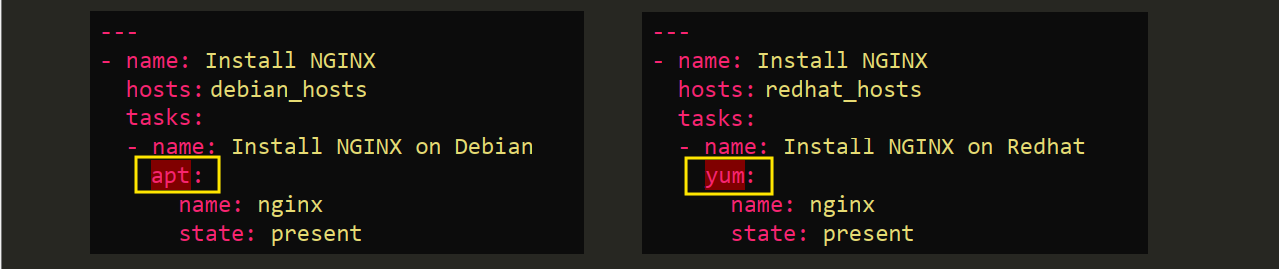

Let us start with a simple example.
* We have two playbooks here that do the same thing: **install NGINX on a host**.
* But as you know, different OS flavors use different package managers.
* **Debian** uses `apt` and **Red Hat** uses `yum`,
* But these are two separate playbooks, and you will have to use the right playbook for the respective servers.

We want to create a single playbook that works for both of these operating systems for all hosts.

So based on the operating system flavor, my playbook must run the appropriate task, and that's where a **conditional statement** comes in handy.

# Condtional - `when`

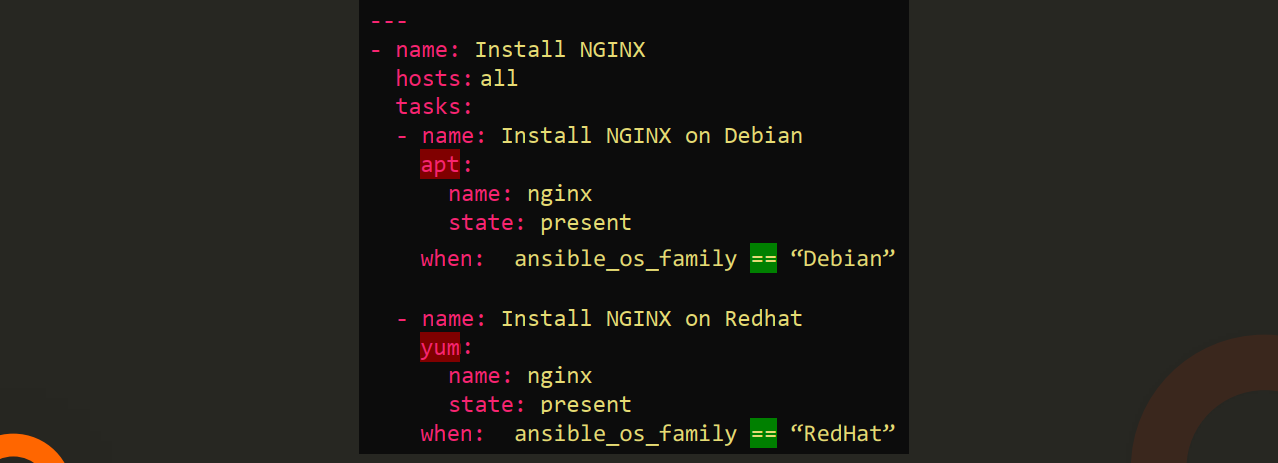

We could use the `when` conditional statement to specify a condition for each task; only if the condition is true, that task is run.

**What is a condition?**

It could be any check that we perform, such as checking if the OS family is Debian or Red Hat.
* The `ansible_os_family` is a built-in variable that Ansible populates with the flavor of the operating system.
* Make sure to use a **double equal sign** when **checking equality** in a conditional statement.

# Conditional - `or`

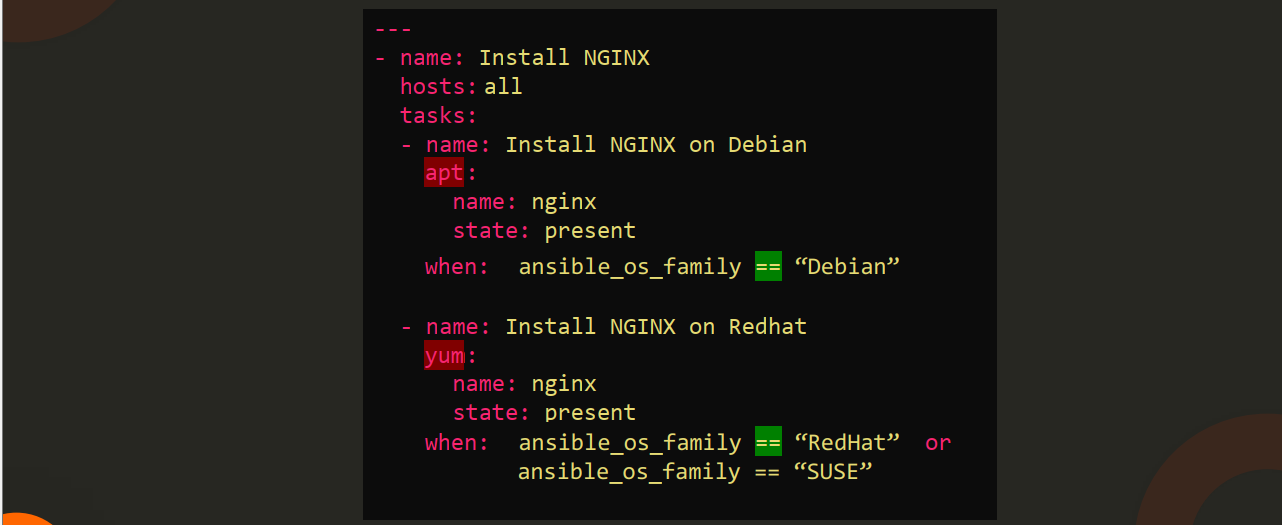

You may use an `or` operator to specify either of two conditions.

Use the `yum` module to install a package if the OS family is: **Red Hat or Suse**.


# Conditional - `and`

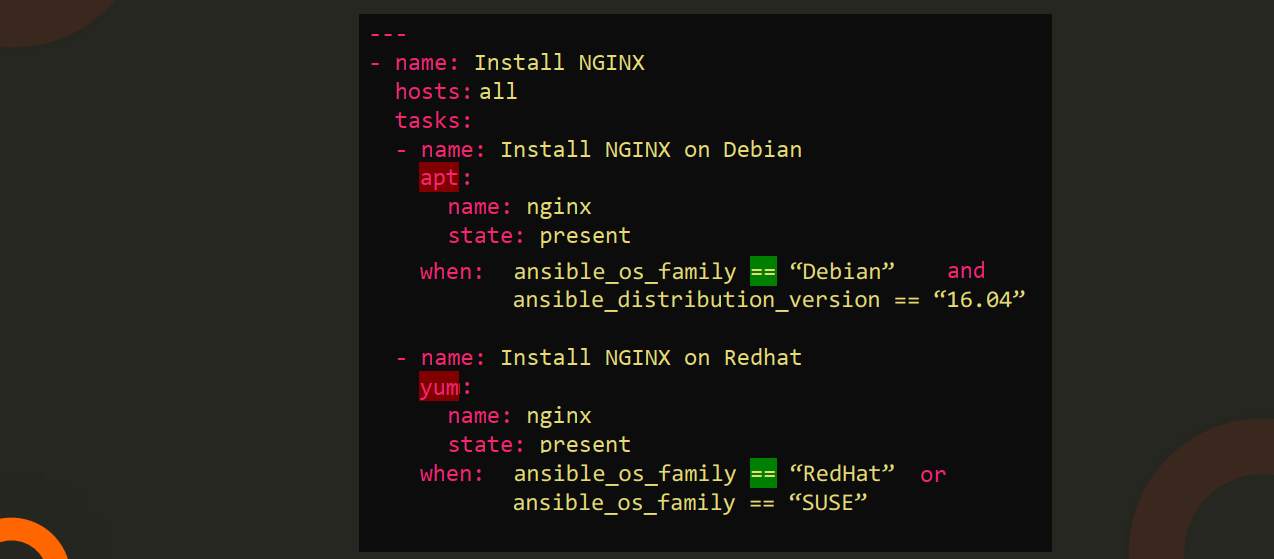

You can also use an `and` operator, so it must satisfy both conditions.

In this case, we use the `apt` module only if the **OS family is Debian** `and` **the version is 16.04**.

# Conditionals in Loop

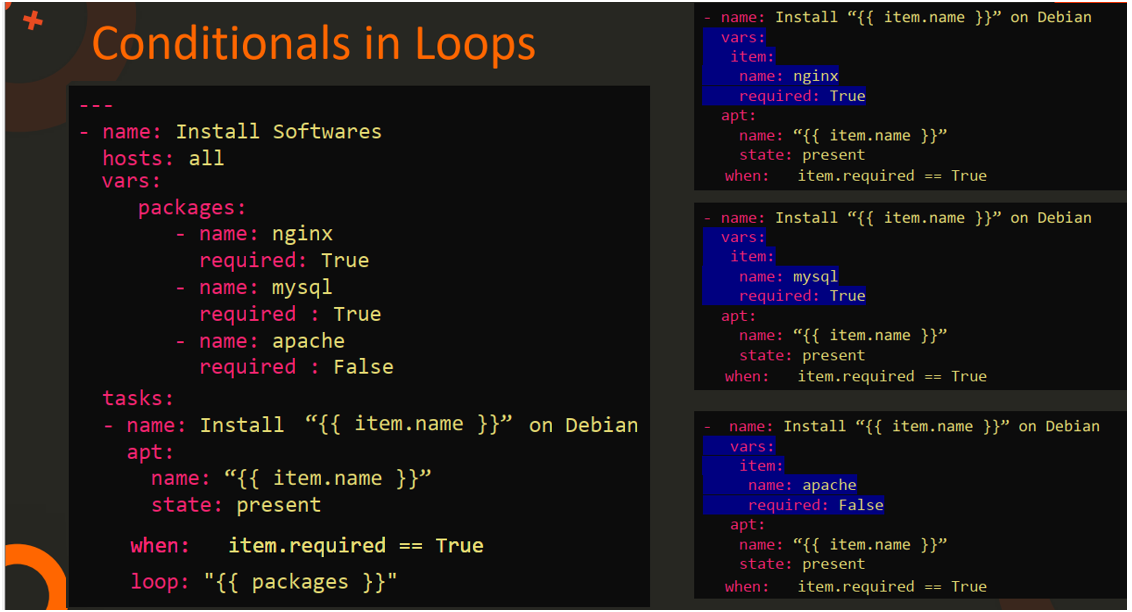

You may use conditionals in a loop as well.

For example, instead of a single package, we have a list of packages that need to be installed.
* We have an array named `packages` that has the list.
* Each item in the list has the name of the package to be installed, as well as a property called `required`.
* Install the packages only if the required property is set to true.

First, we specify the **`loop` directive** to execute the installed `task` in a loop.
* The name of the package to be installed is now `item.name`.
* This will install all three packages specified.

To visualize this better, if you kind of expand the loop, you'll see that the loop is in fact **three different tasks**, one for each package.
* Each task has a variable on it called `item`, and the `item` has the respective package details.
* So if we wanted to write a **conditional for each of the items**, we would say `when item.required == True`.
* So back to the main playbook, that's what we would put in as condtional: `when item.required == True`.

That's how you use conditionals in loops.

# Conditional & Registers

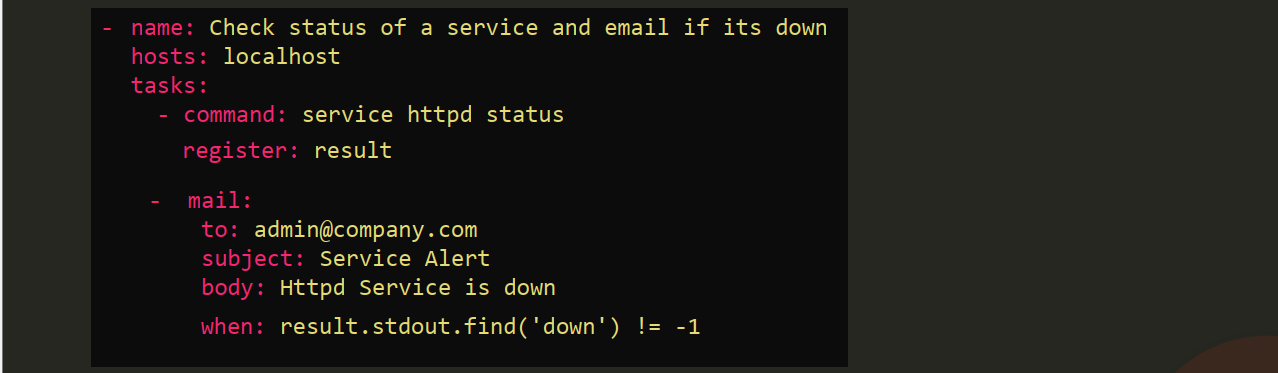

To use conditionals with the output of a previous task, we have a requirement to develop a playbook to check the status of its service and email if it's down.

So there are two tasks.
* The first task checks the status of a **service**.
* The second task **sends an email**.

We have learned previously that to record the output of one task, we could use the **registered directive**.
* So we say `register` the output to the `result` variable.
* Then in the second task, we use the `when` conditional on that `result` variable to check `if result.stdout has down` in it.
* The `find()` method looks for a string within a variable and returns its position.
* If it's not found, it returns `-1`.

So our condition would be if it's not `-1`, meaning that the output does not contain the word down, send an email.